# Implementation  of Quantum Teleportation:

In [1]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister # Importing necessary libraries
from qiskit_textbook.tools import array_to_latex, random_state
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_textbook.tools import random_state, array_to_latex
import qiskit as q
%matplotlib inline
import numpy as np
provider = IBMQ.load_account()

<IPython.core.display.Math object>

The state that sender wants to send


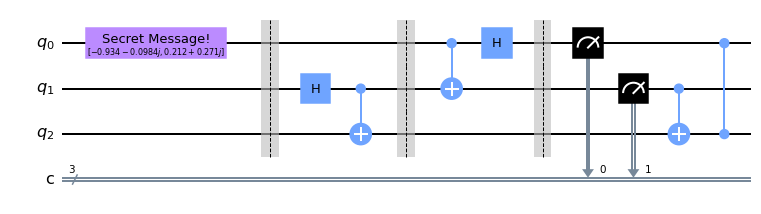

<IPython.core.display.Math object>

The state that has been transported to the receiver


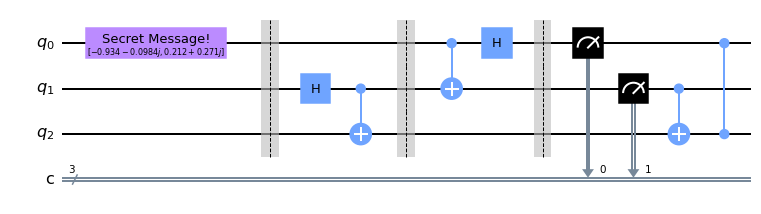

In [2]:
# phi = q.quantum_info.random_state(2)      # Producing the exotic state
phi = random_state(1)
phi_state = array_to_latex(phi)
print("The state that sender wants to send")
phi_state
exotic_state = q.extensions.Initialize(phi)
exotic_state.label = "Secret Message!"       # Transporting the exotic state   
qc = QuantumCircuit(3,3)
qc.append(exotic_state,[0])
qc.barrier()
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure((0,1),(0,1))
qc.cx(1,2)
qc.cz(0,2)
# qc.measure(2,2)
display(qc.draw('mpl'))
backend = Aer.get_backend('statevector_simulator')  # Measuring the transported state
result = execute(qc,backend).result()
state_vector = result.get_statevector( decimals = 3)
state = array_to_latex(state_vector)
print("The state that has been transported to the receiver")
state